# **Đồ án môn học: Nhập môn thị giác máy tính CS231.M22.KHCL**

# Thông tin

*   Đề tài: Hệ thống truy vấn hình ảnh thông qua màu sắc
*   Thông tin sinh viên thực hiện:
 *  Họ và tên: Đặng Xuân Mai
 * MSSV: 19521820

# Các bước thực hiện

## Chuẩn bị

### Kết nối đến Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Import (hoặc cài đặt) các thư viện hỗ trợ cần thiết

In [2]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import pandas as pd
import matplotlib.colors
import numpy as np

import time
from decimal import *

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

import pickle

In [ ]:
!pip install colorthief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from colorthief import ColorThief

### Đặt các đường dẫn

In [3]:
dir_dataset = '/gdrive/MyDrive/dataset'

In [ ]:
subfolders = ['cloudy', 'dew', 'lightning', 'rainbow', 
              'sandstorm', 'shine', 'snow', 'sunrise']

### Tổng quan về tập dữ liệu

In [ ]:
folder_paths = []
each_folder_count = []

In [ ]:
for each in subfolders:
  dir_folder = os.path.join(dir_dataset, each)
  folder_paths.append(dir_folder)
  each_folder_count.append(len(os.listdir(dir_folder)))

In [ ]:
colors = []
hex_color = [ '#79addc', '#ffc09f', '#ffee93', '#fcf5c7', '#adf7b6']
for each in hex_color:
  colors.append(matplotlib.colors.to_rgb(each))

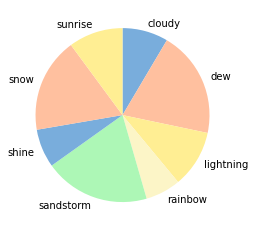

In [ ]:
plt.pie(each_folder_count, labels = subfolders, colors = colors, startangle = 90, counterclock=False)
plt.show() 

In [ ]:
sum(each_folder_count)

3523

### Hàm tính thời gian thực hiện

In [ ]:
def ConvertTime(time):
  return time // 60, time % 60

## Hàm chuyển đổi hệ màu RGB sang 1 số nguyên

In [ ]:
def ConvertRGBToDecimal(triplet):
  R = int(round(triplet[0], 0))
  G = int(round(triplet[1], 0))
  B = int(round(triplet[2], 0))
  return R * 65536 + G * 256 + B

## Trích xuất màu chủ đạo

### Sử dụng KMeans

In [ ]:
def KMeansExtract(img, number_of_colors=5):
  nrow, ncol, nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)
  clf = KMeans(n_clusters = number_of_colors, random_state = 0)
  k_means = clf.fit(g)
  colors = []
  for each in clf.cluster_centers_:
    color = ConvertRGBToDecimal(each)
    colors.append(color)
  res = np.array(colors).reshape(1, -1)
  return res

### Sử dụng thư viện ColorThief

In [ ]:
def ColorthiefExtract(image_path, number_of_colors=5):
  img = ColorThief(image_path)
  dominant_colors = img.get_palette(color_count=number_of_colors)
  colors = []
  for each in dominant_colors:
    color = ConvertRGBToDecimal(each)
    colors.append(color)
  res = np.array(colors).reshape(1, -1)
  return res

### Hàm trích xuất màu chủ đạo

In [ ]:
# option = 0 <=> KMeans; option == 1 <=> ColorThief
def ExtractColors(image_path, option=0, number_of_colors=5):
  if option == 0:
    img = cv.imread(image_path)
    if img is None:
      img = plt.imread(image_path)
      img = img[:,:,:3]
    res = KMeansExtract(img, number_of_colors)
  else:
    res = ColorthiefExtract(image_path, number_of_colors)
  return res

## Đọc ảnh và trích xuất màu chủ đạo từ tập dữ liệu

### Lấy đường dẫn của từng ảnh

In [ ]:
image_paths = []

In [ ]:
for folder in folder_paths:
  images_list = os.listdir(folder)
  for image in images_list:
    image_path = os.path.join(folder, image)
    image_paths.append(image_path)

In [ ]:
with open('imagespath.pkl', 'wb') as file:
    pickle.dump(image_paths, file)

### Thực hiện trích xuất

In [ ]:
def ProcessingData(image_paths, extractor, option=0, number_of_colors=5):
  data = []
  start = time.time()
  for image in image_paths:
    print(image)
    temp = ExtractColors(image, option, number_of_colors)
    data.append(temp)
  end = time.time()
  extractingTime = ConvertTime(Decimal(end - start).normalize())
  print("Thời gian trích xuất khi dùng {} khoảng {} phút {} giây".format(extractor, extractingTime[0], round(extractingTime[1], 2)))
  data = np.array(data)
  data = data.reshape(data.shape[0] * data.shape[1], data.shape[2])
  return data

#### KMeans - 5 màu

In [ ]:
kmeans_5 = ProcessingData(image_paths, 'KMeans')

/gdrive/MyDrive/dataset/cloudy/cloudy1.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy103.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy100.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy102.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy10.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy101.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy139.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy127.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy3.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy255.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy35.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy98.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy188.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy53.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy275.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy81.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy118.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy206.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy299.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy65.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy59.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy67.jpg
/gdrive/MyDrive/datase

In [ ]:
len(kmeans_5)

3523

In [ ]:
kmeans_5

array([[13750737,  5197647, 10197915,  2829099,  7566195],
       [12168098,  4404264,  7954508, 14866387, 10061174],
       [13750739,  2510677, 12037548,  3768452, 11113099],
       ...,
       [  131859, 10669536,  1331858,   268626,  3904459],
       [  397076, 10459787,  3687762,  6596836,  5403540],
       [ 5192740,  4166356, 11445923, 10119188,  1379330]])

In [ ]:
np.save("kmeans_5.npy", kmeans_5)

#### ColorThief - 5 màu

In [ ]:
colorthief_5 = ProcessingData(image_paths, 'ColorThief', 1)

/gdrive/MyDrive/dataset/cloudy/cloudy1.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy103.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy100.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy102.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy10.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy101.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy139.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy127.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy3.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy255.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy35.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy98.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy188.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy53.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy275.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy81.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy118.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy206.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy299.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy65.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy59.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy67.jpg
/gdrive/MyDrive/datase

In [ ]:
len(colorthief_5)

3523

In [ ]:
colorthief_5

array([[ 4868682, 13421772,  9408399, 10790052, 11316396],
       [ 5202037, 13685723, 10199984, 11648718, 10596812],
       [10198957,  7630640,  4274202, 14737113,  5000276],
       ...,
       [13408851,  2164996,  8537106, 10187829, 10253412],
       [ 3551272, 14525797,  8165289, 10060133, 11054758],
       [12493705,   989733,  3506350,  1202569,  7773886]])

In [ ]:
np.save("colorthief_5.npy", colorthief_5)

#### KMeans - 6 màu

In [ ]:
kmeans_6 = ProcessingData(image_paths, 'KMeans', 0, 6)

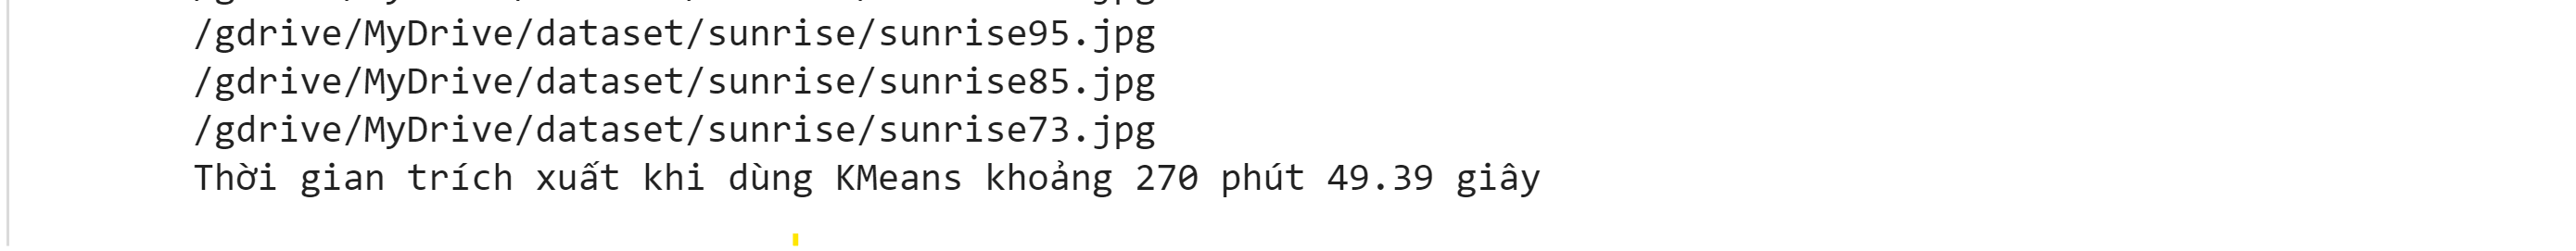

In [ ]:
len(kmeans_6)

In [ ]:
kmeans_6

In [ ]:
np.save("kmeans_6.npy", kmeans_6)

#### ColoThief - 6 màu

In [ ]:
colorthief_6 = ProcessingData(image_paths, 'ColorThief', 1, 6)

/gdrive/MyDrive/dataset/cloudy/cloudy1.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy103.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy100.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy102.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy10.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy101.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy139.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy127.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy3.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy255.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy35.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy98.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy188.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy53.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy275.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy81.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy118.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy206.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy299.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy65.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy59.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy67.jpg
/gdrive/MyDrive/datase

In [ ]:
len(colorthief_6)

3523

In [ ]:
colorthief_6

array([[ 4605510, 13421772,  9408399, 10790052, 11316396,  8158332],
       [ 5794433, 13685723, 10199984,  1911095, 11648718, 10596812],
       [10198701,  7630640,  4274202, 14737113, 13946061,  5000276],
       ...,
       [ 2164996, 13143613,  8537106, 14670530, 10187829, 10253412],
       [ 3090205, 14525797,  8165289, 10060133, 11054758,  7174784],
       [12493705,   989733,  3506350,  1202569,  7773886,  9192484]])

In [ ]:
np.save("colorthief_6.npy", colorthief_6)

### Sử dụng tập dữ liệu Holiday

#### Lấy đường dẫn tập dữ liệu Holiday

In [ ]:
dir_holiday = os.path.join(dir_dataset, 'images')

In [ ]:
holiday_images = os.listdir(dir_holiday)

In [ ]:
holiday_paths = []
for each in holiday_images:
  holiday_paths.append(os.path.join(dir_holiday,each))

In [ ]:
len(holiday_paths)

1490

In [ ]:
with open('imagespath_holiday.pkl', 'wb') as file:
    pickle.dump(holiday_paths, file)

#### Thực hiện trích xuất Histogram

In [4]:
def CalHistogram(image_path, bin=[8,8,8]):
  img = cv.imread(image_path)
  if img is None:
    img = plt.imread(image_path)
    img = img[:,:,:3]
  hist = cv.calcHist([img],[0, 1, 2],None,[bin[0], bin[1], bin[2]],[0,256, 0, 256, 0, 256])
  hist = hist.reshape(1, -1)/ hist.sum()
  return hist

In [ ]:
def CalHistogram_HSV(image_path, bin=[8,8,8]):
  img = cv.imread(image_path)
  img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  hist = cv.calcHist([img],[0, 1, 2],None,[bin[0], bin[1], bin[2]],[0,256, 0, 256, 0, 256])
  hist = hist.reshape(1, -1)/ hist.sum()
  return hist

In [ ]:
def ExtractHistogram(images_paths, bin=[8,12,3]):
  histogram = []
  start = time.time()
  for image in images_paths:
    print(image)
    hist = CalHistogram_HSV(image, bin)
    histogram.append(hist)
  end = time.time()
  extractingTime = ConvertTime(Decimal(end - start).normalize())
  print("Thời gian thực hiện trích xuất histogram với bin = {} khoảng {} phút {} giây: ".format(bin, extractingTime[0], extractingTime[1]))
  histogram = np.array(histogram)
  return histogram

In [ ]:
histogram_holiday_hsv = ExtractHistogram(holiday_paths, [8, 12, 3])

/gdrive/MyDrive/dataset/images/119301.jpg
/gdrive/MyDrive/dataset/images/119600.jpg
/gdrive/MyDrive/dataset/images/117101.jpg
/gdrive/MyDrive/dataset/images/118600.jpg
/gdrive/MyDrive/dataset/images/119501.jpg
/gdrive/MyDrive/dataset/images/119800.jpg
/gdrive/MyDrive/dataset/images/119602.jpg
/gdrive/MyDrive/dataset/images/119605.jpg
/gdrive/MyDrive/dataset/images/119500.jpg
/gdrive/MyDrive/dataset/images/119100.jpg
/gdrive/MyDrive/dataset/images/118002.jpg
/gdrive/MyDrive/dataset/images/119200.jpg
/gdrive/MyDrive/dataset/images/117302.jpg
/gdrive/MyDrive/dataset/images/119202.jpg
/gdrive/MyDrive/dataset/images/117600.jpg
/gdrive/MyDrive/dataset/images/121100.jpg
/gdrive/MyDrive/dataset/images/117500.jpg
/gdrive/MyDrive/dataset/images/119901.jpg
/gdrive/MyDrive/dataset/images/119401.jpg
/gdrive/MyDrive/dataset/images/120000.jpg
/gdrive/MyDrive/dataset/images/118301.jpg
/gdrive/MyDrive/dataset/images/120501.jpg
/gdrive/MyDrive/dataset/images/120100.jpg
/gdrive/MyDrive/dataset/images/118

In [ ]:
np.save("histogram_holiday_hsv.npy", histogram_holiday_hsv)

In [ ]:
histogram_holiday_bin_8 = ExtractHistogram(holiday_paths, [8, 8, 8])

/gdrive/MyDrive/dataset/images/119301.jpg
/gdrive/MyDrive/dataset/images/119600.jpg
/gdrive/MyDrive/dataset/images/117101.jpg
/gdrive/MyDrive/dataset/images/118600.jpg
/gdrive/MyDrive/dataset/images/119501.jpg
/gdrive/MyDrive/dataset/images/119800.jpg
/gdrive/MyDrive/dataset/images/119602.jpg
/gdrive/MyDrive/dataset/images/119605.jpg
/gdrive/MyDrive/dataset/images/119500.jpg
/gdrive/MyDrive/dataset/images/119100.jpg
/gdrive/MyDrive/dataset/images/118002.jpg
/gdrive/MyDrive/dataset/images/119200.jpg
/gdrive/MyDrive/dataset/images/117302.jpg
/gdrive/MyDrive/dataset/images/119202.jpg
/gdrive/MyDrive/dataset/images/117600.jpg
/gdrive/MyDrive/dataset/images/121100.jpg
/gdrive/MyDrive/dataset/images/117500.jpg
/gdrive/MyDrive/dataset/images/119901.jpg
/gdrive/MyDrive/dataset/images/119401.jpg
/gdrive/MyDrive/dataset/images/120000.jpg
/gdrive/MyDrive/dataset/images/118301.jpg
/gdrive/MyDrive/dataset/images/120501.jpg
/gdrive/MyDrive/dataset/images/120100.jpg
/gdrive/MyDrive/dataset/images/118

In [ ]:
np.save("histogram_holiday_bin_8.npy", histogram_holiday_bin_8)

In [ ]:
histogram_holiday_bin_12 = ExtractHistogram(holiday_paths, [12, 12, 12])

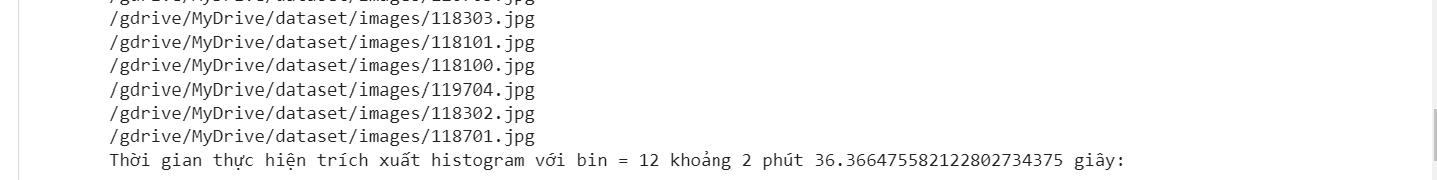

In [ ]:
np.save("histogram_holiday_bin_12.npy", histogram_holiday_bin_12)

In [ ]:
histogram_holiday_bin_30 = ExtractHistogram(holiday_paths, [30, 30, 30])

/gdrive/MyDrive/dataset/images/119301.jpg
/gdrive/MyDrive/dataset/images/119600.jpg
/gdrive/MyDrive/dataset/images/117101.jpg
/gdrive/MyDrive/dataset/images/118600.jpg
/gdrive/MyDrive/dataset/images/119501.jpg
/gdrive/MyDrive/dataset/images/119800.jpg
/gdrive/MyDrive/dataset/images/119602.jpg
/gdrive/MyDrive/dataset/images/119605.jpg
/gdrive/MyDrive/dataset/images/119500.jpg
/gdrive/MyDrive/dataset/images/119100.jpg
/gdrive/MyDrive/dataset/images/118002.jpg
/gdrive/MyDrive/dataset/images/119200.jpg
/gdrive/MyDrive/dataset/images/117302.jpg
/gdrive/MyDrive/dataset/images/119202.jpg
/gdrive/MyDrive/dataset/images/117600.jpg
/gdrive/MyDrive/dataset/images/121100.jpg
/gdrive/MyDrive/dataset/images/117500.jpg
/gdrive/MyDrive/dataset/images/119901.jpg
/gdrive/MyDrive/dataset/images/119401.jpg
/gdrive/MyDrive/dataset/images/120000.jpg
/gdrive/MyDrive/dataset/images/118301.jpg
/gdrive/MyDrive/dataset/images/120501.jpg
/gdrive/MyDrive/dataset/images/120100.jpg
/gdrive/MyDrive/dataset/images/118

In [ ]:
np.save("histogram_holiday_bin_30.npy", histogram_holiday_bin_30)

In [ ]:
len(histogram_holiday_bin_30)

1490

In [ ]:
histogram_holiday_bin_64 = ExtractHistogram(holiday_paths, [64, 64, 64])

/gdrive/MyDrive/dataset/images/119301.jpg
/gdrive/MyDrive/dataset/images/119600.jpg
/gdrive/MyDrive/dataset/images/117101.jpg
/gdrive/MyDrive/dataset/images/118600.jpg
/gdrive/MyDrive/dataset/images/119501.jpg
/gdrive/MyDrive/dataset/images/119800.jpg
/gdrive/MyDrive/dataset/images/119602.jpg
/gdrive/MyDrive/dataset/images/119605.jpg
/gdrive/MyDrive/dataset/images/119500.jpg
/gdrive/MyDrive/dataset/images/119100.jpg
/gdrive/MyDrive/dataset/images/118002.jpg
/gdrive/MyDrive/dataset/images/119200.jpg
/gdrive/MyDrive/dataset/images/117302.jpg
/gdrive/MyDrive/dataset/images/119202.jpg
/gdrive/MyDrive/dataset/images/117600.jpg
/gdrive/MyDrive/dataset/images/121100.jpg
/gdrive/MyDrive/dataset/images/117500.jpg
/gdrive/MyDrive/dataset/images/119901.jpg
/gdrive/MyDrive/dataset/images/119401.jpg
/gdrive/MyDrive/dataset/images/120000.jpg
/gdrive/MyDrive/dataset/images/118301.jpg
/gdrive/MyDrive/dataset/images/120501.jpg
/gdrive/MyDrive/dataset/images/120100.jpg
/gdrive/MyDrive/dataset/images/118

In [ ]:
np.save("histogram_holiday_bin_64.npy", histogram_holiday_bin_64)

In [ ]:
len(histogram_holiday_bin_64)

1490

In [ ]:
histogram_holiday = ExtractHistogram(holiday_paths)

/gdrive/MyDrive/dataset/images/119301.jpg
/gdrive/MyDrive/dataset/images/119600.jpg
/gdrive/MyDrive/dataset/images/117101.jpg
/gdrive/MyDrive/dataset/images/118600.jpg
/gdrive/MyDrive/dataset/images/119501.jpg
/gdrive/MyDrive/dataset/images/119800.jpg
/gdrive/MyDrive/dataset/images/119602.jpg
/gdrive/MyDrive/dataset/images/119605.jpg
/gdrive/MyDrive/dataset/images/119500.jpg
/gdrive/MyDrive/dataset/images/119100.jpg
/gdrive/MyDrive/dataset/images/118002.jpg
/gdrive/MyDrive/dataset/images/119200.jpg
/gdrive/MyDrive/dataset/images/117302.jpg
/gdrive/MyDrive/dataset/images/119202.jpg
/gdrive/MyDrive/dataset/images/117600.jpg
/gdrive/MyDrive/dataset/images/121100.jpg
/gdrive/MyDrive/dataset/images/117500.jpg
/gdrive/MyDrive/dataset/images/119901.jpg
/gdrive/MyDrive/dataset/images/119401.jpg
/gdrive/MyDrive/dataset/images/120000.jpg
/gdrive/MyDrive/dataset/images/118301.jpg
/gdrive/MyDrive/dataset/images/120501.jpg
/gdrive/MyDrive/dataset/images/120100.jpg
/gdrive/MyDrive/dataset/images/118

In [ ]:
np.save("histogram_holiday.npy", histogram_holiday)

In [ ]:
histogram_holiday.shape

(1490, 1, 288)

In [ ]:
histogram = []

In [ ]:
start = time.time()
for image in image_paths:
  print(image)
  hist = CalHistogram(image)
  histogram.append(hist)
end = time.time()
extractingTime = ConvertTime(Decimal(end - start).normalize())
print("Thời gian thực hiện trích xuất histogram khoảng {} phút {} giây: ".format(extractingTime[0], extractingTime[1]))

/gdrive/MyDrive/dataset/cloudy/cloudy1.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy103.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy100.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy102.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy10.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy101.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy139.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy127.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy3.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy255.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy35.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy98.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy188.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy53.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy275.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy81.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy118.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy206.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy299.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy65.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy59.jpg
/gdrive/MyDrive/dataset/cloudy/cloudy67.jpg
/gdrive/MyDrive/datase

In [ ]:
len(histogram)

3523

In [ ]:
histogram

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.00322083]], dtype=float32),
 array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.9870840e-05,
         6.3586689e-04, 3.7555888e-03]], dtype=float32),
 array([[0.0000000e+00, 1.9902081e-05, 3.9804163e-05, ..., 0.0000000e+00,
         0.0000000e+00, 7.9608326e-05]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[1.5970321e-02, 0.0000000e+00, 0.0000000e+00, ..., 3.1742253e-04,
         2.2021187e-03, 1.9838908e-05]], dtype=float32),
 array([[0.00137008, 0.00542075, 0.00037727, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[1.2657725e-02, 7.9483361e-05, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.00030382, 0.00090278,
         0.        ]], dtype=float32),
 array([[2.7310508e-03, 2.9091628e-03, 7.9160891e-05, ..., 0.0000000e+00,
       

In [ ]:
histogram = np.array(histogram)
type(histogram)

numpy.ndarray

In [ ]:
np.save("histogram.npy", histogram)

## Đánh giá hệ thống truy vấn

In [ ]:
dir_query = '/gdrive/MyDrive/dataset/query'
q_list = os.listdir(dir_query)

### Tạo bộ nhãn tương ứng với mỗi ảnh

In [ ]:
labels = []
for index in range(len(each_folder_count)):
  labels += [index] * each_folder_count[index]
labels = np.array(labels).reshape(-1, 1)

In [ ]:
# Check
for i in range(len(each_folder_count)):
  print(np.count_nonzero(labels == i))

300
697
376
231
691
252
620
356


In [ ]:
with open('labels.pkl', 'wb') as file:
    pickle.dump(labels, file)

### Hàm tính Cosin Similarity

In [ ]:
def CalculateCosine(query_path, data_feature, option=0, number_of_colors=5):
  query_feature = ExtractColors(query_path, option, number_of_colors)
  cosine_array = [cosine_similarity(query_feature, i.reshape(1, -1)) for i in data_feature]
  res = [cosine_array[i][0][0] for i in range(len(data_feature))]
  res = np.array(res)
  return res

### Hàm tính Average Precision

In [ ]:
def CalculateAP(query_gt, predicted, n=20):
  precisions = []
  for index in range(len(predicted)):
    if query_gt == predicted[index]:
      precision = (len(precisions) + 1) / (index + 1)
      precisions.append(precision)
  average_precision = sum(precisions) / n
  print("Precision ~", len(precisions) / n)
  return average_precision

### Hàm trả về kết quả ảnh

In [ ]:
def ShowImages(images_path, ground_truth, row=10, column=2):
  plt.figure(figsize=(15, 30))
  for i in range(len(images_path)):
    img = images_path[i]
    img = cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB)
    plt.subplot(row, column, i+1)
    plt.title(ground_truth[i])
    plt.axis('off')
    plt.imshow(img, aspect="auto")
  plt.show()

### Đánh giá trên tập ảnh truy vấn

In [ ]:
def Evaluating(query_path, query_gt, data_feature, labels, image_paths, option=0, number_of_colors=5):
  print("Ảnh truy vấn")
  cv2_imshow(cv.imread(query_path))
  print("Ground_truth: ", query_gt)
  cosine_arr = CalculateCosine(query_path, data_feature, option, number_of_colors)
  top_indices = cosine_arr.argsort()[:-21:-1]
  top_paths = [image_paths[i] for i in top_indices]
  print(top_paths)
  grounth_truth = [labels[i] for i in top_indices]
  print("Top-20 hình ảnh trả về")
  ShowImages(top_paths, grounth_truth)
  ap = CalculateAP(query_gt, grounth_truth)
  print("Average Precision: ", ap)
  return ap

In [ ]:
queries = []
for i in q_list:
  path =  os.path.join(dir_query, i)
  queries.append(path)

In [ ]:
queries 

['/gdrive/MyDrive/dataset/query/cloudy113.jpg',
 '/gdrive/MyDrive/dataset/query/shine28.jpg',
 '/gdrive/MyDrive/dataset/query/sunrise201.jpg',
 '/gdrive/MyDrive/dataset/query/2811.jpg',
 '/gdrive/MyDrive/dataset/query/2001.jpg',
 '/gdrive/MyDrive/dataset/query/0702.jpg',
 '/gdrive/MyDrive/dataset/query/2977.jpg',
 '/gdrive/MyDrive/dataset/query/0963.jpg']

In [ ]:
subfolders = ['cloudy', 'dew', 'lightning', 'rainbow', 
              'sandstorm', 'shine', 'snow', 'sunrise']

In [ ]:
gts = [0, 5, 7, 1, 2, 3, 4, 6]

In [ ]:
def CompareExtractor(data, qs, gts, labels, image_paths, option=0, number_of_colors=5):
  aps = []
  for each_q, each_gt in zip(qs, gts):
    aps.append(Evaluating(each_q, each_gt, data, labels, image_paths, option, number_of_colors))
  return aps

In [ ]:
dir_model = '/gdrive/MyDrive/dataset/demo'

In [ ]:
kmeans_5 = np.load(os.path.join(dir_model, 'kmeans_5.npy'))
kmeans_6 = np.load(os.path.join(dir_model, 'kmeans_6.npy'))
colorthief_5 = np.load(os.path.join(dir_model, 'colorthief_5.npy'))
colorthief_6 = np.load(os.path.join(dir_model, 'colorthief_6.npy'))

In [ ]:
histogram_holiday = np.load(os.path.join(dir_model, 'histogram_holiday.npy'))

#### Dùng K-Means, ColorThief

In [ ]:
aps_k5 = CompareExtractor(kmeans_5, queries, gts, labels, image_paths)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
aps_k6 = CompareExtractor(kmeans_6, queries, gts, labels, image_paths, 0, 6)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
aps_c5 = CompareExtractor(colorthief_5, queries, gts, labels, image_paths, 1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
aps_c6 = CompareExtractor(colorthief_6, queries, gts, labels, image_paths, 1, 6)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
mAPs = [sum(i) / len(queries) for i in [aps_k5, aps_k6, aps_c5, aps_c6]]

In [ ]:
table = {'Hàm trích xuất': ['KMeans', 'KMeans', 'ColorThief', 'ColorThief'],
         'Số màu': [5, 6, 5, 6], 
         'Max AP': [max(i) for i in [aps_k5, aps_k6, aps_c5, aps_c6]],
         'Min AP': [min(i) for i in [aps_k5, aps_k6, aps_c5, aps_c6]],
         'mAP': mAPs,
         "Thời gian trích xuất:": ["200 phút 59.85 giây", "270 phút 49.39 giây", "12 phút 2.46 giây", "11 phút 49.47 giây"]}

In [ ]:
result = pd.DataFrame(table)
result

,Hàm trích xuất,Số màu,Max AP,Mix AP,mAP,Thời gian trích xuất:
0,KMeans,5,0.770650,0.012500,0.229104,200 phút 59.85 giây
1,KMeans,6,0.447987,0.002778,0.164828,270 phút 49.39 giây
2,ColorThief,5,0.716948,0.007143,0.257983,12 phút 2.46 giây
3,ColorThief,6,0.816873,0.004545,0.210316,11 phút 49.47 giây


#### Dùng histogram

In [ ]:
histo_model = CompareExtractor(histogram, queries, gts, labels, image_paths)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
mAP_hist = sum(histo_model) / len(queries) 
mAP_hist

0.429599235688632

### Đánh giá trên bộ dữ liệu Holiday

In [ ]:
histogram_holiday_bin_12 = np.load(os.path.join(dir_model, 'histogram_holiday_bin_12.npy'))
histogram_holiday_bin_30 = np.load(os.path.join(dir_model, 'histogram_holiday_bin_30.npy'))
histogram_holiday_bin_64 = np.load(os.path.join(dir_model, 'histogram_holiday_bin_64.npy'))
histogram_holiday = np.load(os.path.join(dir_model, 'histogram_holiday.npy'))

In [ ]:
histogram_holiday_bin_8 = np.load(os.path.join(dir_model, 'histogram_holiday_bin_8.npy'))

In [ ]:
queries_path = os.path.join(dir_model, 'perfect_result.dat')

In [ ]:
histogram_holiday_hsv = np.load(os.path.join(dir_model, 'histogram_holiday_hsv.npy'))

In [ ]:
histogram_holiday_hsv = np.load('histogram_holiday_hsv.npy')

In [ ]:
with open(queries_path, 'r') as f:
  data = f.readlines()

In [ ]:
data

['107100.jpg 0 107101.jpg\n',
 '147800.jpg 0 147802.jpg 1 147801.jpg\n',
 '143000.jpg 0 143001.jpg\n',
 '116400.jpg 0 116402.jpg 1 116401.jpg\n',
 '107900.jpg 0 107902.jpg 1 107901.jpg\n',
 '124300.jpg 0 124302.jpg 1 124301.jpg\n',
 '126000.jpg 0 126001.jpg 1 126002.jpg\n',
 '105100.jpg 0 105104.jpg 1 105101.jpg 2 105103.jpg 3 105102.jpg\n',
 '129700.jpg 0 129701.jpg\n',
 '115500.jpg 0 115501.jpg\n',
 '149500.jpg 0 149501.jpg\n',
 '137600.jpg 0 137602.jpg 1 137603.jpg 2 137601.jpg\n',
 '116600.jpg 0 116601.jpg\n',
 '117600.jpg 0 117601.jpg\n',
 '133300.jpg 0 133301.jpg\n',
 '111800.jpg 0 111801.jpg\n',
 '140900.jpg 0 140902.jpg 1 140901.jpg\n',
 '137000.jpg 0 137005.jpg 1 137007.jpg 2 137004.jpg 3 137006.jpg 4 137002.jpg 5 137001.jpg 6 137003.jpg\n',
 '149800.jpg 0 149801.jpg\n',
 '106300.jpg 0 106301.jpg\n',
 '105400.jpg 0 105401.jpg\n',
 '143300.jpg 0 143301.jpg\n',
 '105200.jpg 0 105201.jpg\n',
 '122800.jpg 0 122801.jpg\n',
 '121900.jpg 0 121901.jpg\n',
 '145500.jpg 0 145501.jpg 1 1

In [ ]:
for i in range(len(data)):
  data[i] = data[i].replace('\n', '')
data

['107100.jpg 0 107101.jpg',
 '147800.jpg 0 147802.jpg 1 147801.jpg',
 '143000.jpg 0 143001.jpg',
 '116400.jpg 0 116402.jpg 1 116401.jpg',
 '107900.jpg 0 107902.jpg 1 107901.jpg',
 '124300.jpg 0 124302.jpg 1 124301.jpg',
 '126000.jpg 0 126001.jpg 1 126002.jpg',
 '105100.jpg 0 105104.jpg 1 105101.jpg 2 105103.jpg 3 105102.jpg',
 '129700.jpg 0 129701.jpg',
 '115500.jpg 0 115501.jpg',
 '149500.jpg 0 149501.jpg',
 '137600.jpg 0 137602.jpg 1 137603.jpg 2 137601.jpg',
 '116600.jpg 0 116601.jpg',
 '117600.jpg 0 117601.jpg',
 '133300.jpg 0 133301.jpg',
 '111800.jpg 0 111801.jpg',
 '140900.jpg 0 140902.jpg 1 140901.jpg',
 '137000.jpg 0 137005.jpg 1 137007.jpg 2 137004.jpg 3 137006.jpg 4 137002.jpg 5 137001.jpg 6 137003.jpg',
 '149800.jpg 0 149801.jpg',
 '106300.jpg 0 106301.jpg',
 '105400.jpg 0 105401.jpg',
 '143300.jpg 0 143301.jpg',
 '105200.jpg 0 105201.jpg',
 '122800.jpg 0 122801.jpg',
 '121900.jpg 0 121901.jpg',
 '145500.jpg 0 145501.jpg 1 145502.jpg',
 '141700.jpg 0 141702.jpg 1 141703.jpg

In [ ]:
len(data)

500

In [ ]:
holiday_queries = []
ground_truth = []

In [ ]:
for each in data: 
  arr = each.split()
  holiday_queries.append(arr[0])
  ground_truth.append([arr[i] for i in range(len(arr)) if i != 0 and i % 2 == 0])

In [ ]:
holiday_queries

['107100.jpg',
 '147800.jpg',
 '143000.jpg',
 '116400.jpg',
 '107900.jpg',
 '124300.jpg',
 '126000.jpg',
 '105100.jpg',
 '129700.jpg',
 '115500.jpg',
 '149500.jpg',
 '137600.jpg',
 '116600.jpg',
 '117600.jpg',
 '133300.jpg',
 '111800.jpg',
 '140900.jpg',
 '137000.jpg',
 '149800.jpg',
 '106300.jpg',
 '105400.jpg',
 '143300.jpg',
 '105200.jpg',
 '122800.jpg',
 '121900.jpg',
 '145500.jpg',
 '141700.jpg',
 '121600.jpg',
 '100800.jpg',
 '142900.jpg',
 '141200.jpg',
 '137500.jpg',
 '102300.jpg',
 '114200.jpg',
 '110400.jpg',
 '123800.jpg',
 '146000.jpg',
 '113300.jpg',
 '142100.jpg',
 '128900.jpg',
 '106400.jpg',
 '125100.jpg',
 '126900.jpg',
 '109500.jpg',
 '135500.jpg',
 '146400.jpg',
 '103800.jpg',
 '125700.jpg',
 '141600.jpg',
 '119800.jpg',
 '102000.jpg',
 '145100.jpg',
 '120200.jpg',
 '127300.jpg',
 '115900.jpg',
 '130300.jpg',
 '100000.jpg',
 '117300.jpg',
 '147900.jpg',
 '120100.jpg',
 '119100.jpg',
 '100500.jpg',
 '125200.jpg',
 '104500.jpg',
 '112800.jpg',
 '147000.jpg',
 '135700.j

In [ ]:
index = 0
for each in ground_truth:
  each.append(holiday_queries[index])
  index += 1

In [ ]:
ground_truth

[['107101.jpg', '107100.jpg'],
 ['147802.jpg', '147801.jpg', '147800.jpg'],
 ['143001.jpg', '143000.jpg'],
 ['116402.jpg', '116401.jpg', '116400.jpg'],
 ['107902.jpg', '107901.jpg', '107900.jpg'],
 ['124302.jpg', '124301.jpg', '124300.jpg'],
 ['126001.jpg', '126002.jpg', '126000.jpg'],
 ['105104.jpg', '105101.jpg', '105103.jpg', '105102.jpg', '105100.jpg'],
 ['129701.jpg', '129700.jpg'],
 ['115501.jpg', '115500.jpg'],
 ['149501.jpg', '149500.jpg'],
 ['137602.jpg', '137603.jpg', '137601.jpg', '137600.jpg'],
 ['116601.jpg', '116600.jpg'],
 ['117601.jpg', '117600.jpg'],
 ['133301.jpg', '133300.jpg'],
 ['111801.jpg', '111800.jpg'],
 ['140902.jpg', '140901.jpg', '140900.jpg'],
 ['137005.jpg',
  '137007.jpg',
  '137004.jpg',
  '137006.jpg',
  '137002.jpg',
  '137001.jpg',
  '137003.jpg',
  '137000.jpg'],
 ['149801.jpg', '149800.jpg'],
 ['106301.jpg', '106300.jpg'],
 ['105401.jpg', '105400.jpg'],
 ['143301.jpg', '143300.jpg'],
 ['105201.jpg', '105200.jpg'],
 ['122801.jpg', '122800.jpg'],
 ['1

In [ ]:
def CalculateCosine_Holiday(query_path, data_feature, bin=[8, 12, 3]):
  query_feature = CalHistogram(query_path, bin)
  cosine_array = [cosine_similarity(query_feature, i.reshape(1, -1)) for i in data_feature]
  res = [cosine_array[i][0][0] for i in range(len(data_feature))]
  res = np.array(res)
  return res

In [ ]:
def CalculateAP_Holiday(query_gt, ground_truth, n=20):
  precisions = []
  for index in range(len(ground_truth)):
    each = ground_truth[index]
    if each in query_gt:
      precision = (len(precisions) + 1) / (index + 1)
      precisions.append(precision)
  n = min(n, 20)
  average_precision = sum(precisions) / n
  print("Precision ~", len(precisions) / n)
  return average_precision

In [ ]:
def Evaluating_Holiday(query_path, query_gt, data_feature, image_paths, bin = [8, 12, 3]):
  cosine_arr = CalculateCosine_Holiday(query_path, data_feature, bin)
  top_indices = cosine_arr.argsort()[:-21:-1]
  top_paths = [image_paths[i] for i in top_indices]
  ground_truth = []
  for each in top_paths:
    temp = each.replace('/gdrive/MyDrive/dataset/images/', '')
    ground_truth.append(temp)
  ap = CalculateAP_Holiday(query_gt, ground_truth, len(query_gt))
  print("Average Precision: ", ap)
  return ap

In [ ]:
def Evaluating(queries, ground_truth, histogram_feature, holiday_paths, bin=[8,12,3]):
  aps_holiday = []
  i = 0
  count = 0
  for each_q in queries:
    print("Query: ", each_q)
    query_path = os.path.join(dir_holiday, each_q)
    img = cv.imread(query_path)
    if img is not None:
      ap = Evaluating_Holiday(query_path, ground_truth[i], histogram_feature, holiday_paths, bin)
      aps_holiday.append(ap)
    else:
      count += 1
      print("Image doesn't exist")
    i+=1
  mAP_holiday = sum(aps_holiday) / (len(queries) - count) 
  return mAP_holiday

In [ ]:
mAP_hsv = Evaluating(holiday_queries, ground_truth, histogram_holiday_hsv, holiday_paths, [8, 12, 3])

Query:  107100.jpg
2
Precision ~ 1.0
Average Precision:  1.0
Query:  147800.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.5
Query:  143000.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query:  116400.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  107900.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  124300.jpg
3
Precision ~ 1.0
Average Precision:  0.7555555555555555
Query:  126000.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  105100.jpg
5
Precision ~ 0.4
Average Precision:  0.2235294117647059
Query:  129700.jpg
2
Precision ~ 1.0
Average Precision:  1.0
Query:  115500.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query:  149500.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query:  137600.jpg
4
Precision ~ 0.75
Average Precision:  0.6875
Query:  116600.jpg
2
Precision ~ 1.0
Average Precision:  1.0
Query:  117600.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query: 

In [ ]:
mAP_hsv

0.6218108387276904

In [ ]:
mAP_bin8 = Evaluating(holiday_queries, ground_truth, histogram_holiday_bin_8, holiday_paths, [8, 8, 8])

Query:  107100.jpg
2
Precision ~ 1.0
Average Precision:  1.0
Query:  147800.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.4666666666666666
Query:  143000.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query:  116400.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  107900.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.393939393939394
Query:  124300.jpg
3
Precision ~ 1.0
Average Precision:  0.6666666666666666
Query:  126000.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  105100.jpg
5
Precision ~ 0.2
Average Precision:  0.2
Query:  129700.jpg
2
Precision ~ 1.0
Average Precision:  1.0
Query:  115500.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query:  149500.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query:  137600.jpg
4
Precision ~ 0.75
Average Precision:  0.6875
Query:  116600.jpg
2
Precision ~ 1.0
Average Precision:  1.0
Query:  117600.jpg
2
Precision ~ 0.5
Average Precision:  0.5
Query:  

In [ ]:
mAP_bin8

0.6332362601717861

In [ ]:
mAP_bin12 = Evaluating(holiday_queries, ground_truth, histogram_holiday_bin_12, holiday_paths, [12, 12, 12])

Query:  107100.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  147800.jpg
4
Precision ~ 0.5
Average Precision:  0.3333333333333333
Query:  143000.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  116400.jpg
4
Precision ~ 0.5
Average Precision:  0.2857142857142857
Query:  107900.jpg
4
Precision ~ 0.5
Average Precision:  0.41666666666666663
Query:  124300.jpg
4
Precision ~ 0.75
Average Precision:  0.75
Query:  126000.jpg
4
Precision ~ 0.5
Average Precision:  0.3055555555555556
Query:  105100.jpg
6
Precision ~ 0.3333333333333333
Average Precision:  0.20370370370370372
Query:  129700.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  115500.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.5555555555555555
Query:  149500.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  137600.jpg
5
Precision ~ 0.8
Average Precision:  0.5900000000000001
Query:  1

In [ ]:
mAP_bin12

0.4583115691321267

In [ ]:
mAP_bin30 = Evaluating(holiday_queries, ground_truth, histogram_holiday_bin_30, holiday_paths, [30, 30, 30])

Query:  107100.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  147800.jpg
4
Precision ~ 0.5
Average Precision:  0.2916666666666667
Query:  143000.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  116400.jpg
4
Precision ~ 0.25
Average Precision:  0.25
Query:  107900.jpg
4
Precision ~ 0.5
Average Precision:  0.5
Query:  124300.jpg
4
Precision ~ 0.75
Average Precision:  0.5625
Query:  126000.jpg
4
Precision ~ 0.25
Average Precision:  0.25
Query:  105100.jpg
6
Precision ~ 0.3333333333333333
Average Precision:  0.21428571428571427
Query:  129700.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  115500.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  149500.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  137600.jpg
5
Precision ~ 0.8
Average Precision:  0.6444444444444445
Query:  116600.jpg
3
Precision ~ 0.66666666666666

In [ ]:
mAP_bin30

0.457929471965306

In [ ]:
mAP_bin64 = Evaluating(holiday_queries, ground_truth, histogram_holiday_bin_64, holiday_paths, [64, 64, 64])

Query:  107100.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  147800.jpg
4
Precision ~ 0.5
Average Precision:  0.35
Query:  143000.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  116400.jpg
4
Precision ~ 0.5
Average Precision:  0.2763157894736842
Query:  107900.jpg
4
Precision ~ 0.5
Average Precision:  0.5
Query:  124300.jpg
4
Precision ~ 0.5
Average Precision:  0.5
Query:  126000.jpg
4
Precision ~ 0.25
Average Precision:  0.25
Query:  105100.jpg
6
Precision ~ 0.5
Average Precision:  0.24999999999999997
Query:  129700.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.37777777777777777
Query:  115500.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  149500.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  137600.jpg
5
Precision ~ 0.6
Average Precision:  0.6
Query:  116600.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.555555555

In [ ]:
mAP_bin64

0.44849962985154657

In [ ]:
mAP_holiday = Evaluating(holiday_queries, ground_truth, histogram_holiday, holiday_paths)

Query:  107100.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  147800.jpg
4
Precision ~ 0.5
Average Precision:  0.375
Query:  143000.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  116400.jpg
4
Precision ~ 0.25
Average Precision:  0.25
Query:  107900.jpg
4
Precision ~ 0.5
Average Precision:  0.5
Query:  124300.jpg
4
Precision ~ 0.75
Average Precision:  0.5666666666666667
Query:  126000.jpg
4
Precision ~ 0.25
Average Precision:  0.25
Query:  105100.jpg
6
Precision ~ 0.3333333333333333
Average Precision:  0.18627450980392157
Query:  129700.jpg
3
Precision ~ 0.6666666666666666
Average Precision:  0.6666666666666666
Query:  115500.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  149500.jpg
3
Precision ~ 0.3333333333333333
Average Precision:  0.3333333333333333
Query:  137600.jpg
5
Precision ~ 0.6
Average Precision:  0.55
Query:  116600.jpg
3
Precision ~ 0.6666666666666666
Average Prec

In [ ]:
mAP_holiday

0.44273610776607614

# Demo

## Tải các file liên quan

In [5]:
dir_dataset = '/gdrive/MyDrive/dataset' 
dir_demo = os.path.join(dir_dataset, 'demo')
data_path = os.path.join(dir_demo, 'histogram_holiday_bin_8.npy') 
path_to_image = os.path.join(dir_demo, "imagespath_holiday.pkl")

In [6]:
data = np.load(data_path) 
with open(path_to_image, "rb") as file:
  image_paths = pickle.load(file)

In [ ]:
len(image_paths)

1490

## Người dùng chọn ảnh muốn truy vấn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 101400.jpg to 101400.jpg


In [ ]:
img_name = '101400.jpg'

In [ ]:
cv2_imshow(cv.imread(img_name))

Output hidden; open in https://colab.research.google.com to view.

## Xử lý ảnh và trả về top 20 ảnh có màu sắc tương tự

In [ ]:
def CalculateCosine_Holiday(query_path, data_feature, bin=[8,8,8]):
  query_feature = CalHistogram(query_path, bin)
  cosine_array = [cosine_similarity(query_feature, i.reshape(1, -1)) for i in data_feature]
  res = [cosine_array[i][0][0] for i in range(len(data_feature))]
  res = np.array(res)
  return res

In [ ]:
def ShowImages(images_path, row=10, column=2):
  plt.figure(figsize=(15, 30))
  for i in range(len(images_path)):
    img = images_path[i]
    img = cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB)
    plt.subplot(row, column, i+1)
    plt.title('Ảnh thứ {}'.format(i + 1))
    plt.axis('off')
    plt.imshow(img, aspect="auto")
  plt.show()

In [ ]:
def Testing(query_path, data_feature, image_paths):
  cv2_imshow(cv.imread(query_path))
  cosine_arr = CalculateCosine_Holiday(query_path, data_feature)
  top_indices = cosine_arr.argsort()[:-21:-1]
  top_paths = [image_paths[i] for i in top_indices]
  print(top_paths)
  print("Top-20 hình ảnh trả về")
  ShowImages(top_paths)

In [ ]:
Testing(img_name, data, image_paths)

Output hidden; open in https://colab.research.google.com to view.